# Analisis de la metrica RTT utilizando el comando Ping

## Objetivo 

Analizar los tiempos de respuesta de un host durante una ventana de tiempo de 2 horas.

## Procedimiento

Se utilizara jupyter notebook para ejecutar un script de python. El cual mediante el uso de un Thead dejará corriendo el comando ping durante el tiempo estipulado en el objetivo y su salida quedará registrada en un archivo `.txt`. 

Luego se procesará dicho archivo extrayendo en cada linea el RTT de cada ejecucion del comando. 

Finalmente los tiempos obtenidos serán graficados en un histograma en escala lineal y otro en escala logaritmo-logaritmo

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]
import re
import os
import subprocess
from threading import Thread, Event 
import time

In [2]:
HOST = 'mercadolibre.com.ar'
TOTAL_DURATION = 7200 # 2 horas en segundos
OUTPUT_FILE = 'results.txt'

In [3]:
start_time = time.time()
end_time = start_time + TOTAL_DURATION

In [4]:
def run_ping(event: Event):
    out = open(OUTPUT_FILE, 'a')
    subprocess.call(['ping', HOST], stdout = out)
    

In [5]:
terminate_thread = Event()
ping_thread = Thread(target=run_ping, args=(terminate_thread,))
ping_thread.start()

In [6]:
try:
    while time.time() < end_time:
        pass
    terminate_thread.set()
except KeyboardInterrupt:
    terminate_thread.set()

In [7]:
times = []

time_ping_pattern = r"time=(\d+\.\d+) ms"

with open(OUTPUT_FILE, 'r') as results:
    for line in results:
        match = re.findall(time_ping_pattern, line)
        if match:
            times.extend(map(float, match))

## Histograma en escala lineal

En el siguiente histograma se agruparan los tiempos segun su cantidad de ocurrencias y estarán divididos en 1000 grupos.

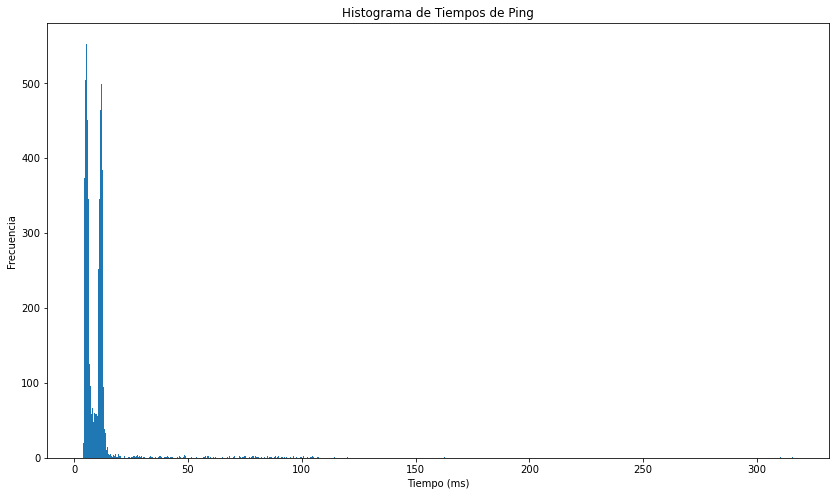

In [10]:
plt.hist(times, bins=1000)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempos de Ping')
plt.show()

## Histograma en escala logaritmica

En el siguiente histograma se agruparan los tiempos segun su cantidad de ocurrencias y estarán divididos en 1000 grupos.

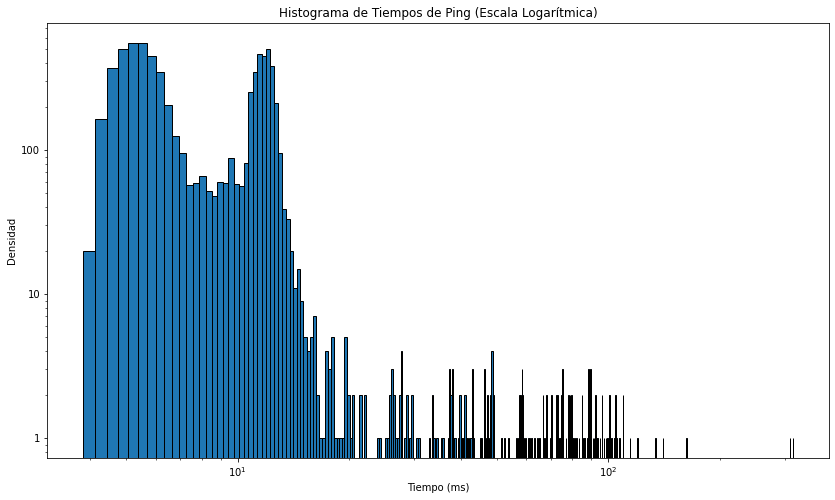

In [11]:
plt.hist(times, bins=1000, edgecolor='k')

plt.xlabel('Tiempo (ms)')
plt.ylabel('Densidad')
plt.xscale('log')
plt.yscale('log')
plt.title('Histograma de Tiempos de Ping (Escala Logarítmica)')

plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter())

plt.show()

## Tail de la ejecucion ping

Se muestran metricas generales de la ejecucion

```text
--- mercadolibre.com.ar ping statistics ---
7224 packets transmitted, 7203 packets received, 0.3% packet loss
round-trip min/avg/max/stddev = 3.816/10.065/315.841/11.526 ms
```

## Analisis de Resultados

Es importante mencionar que la prueba fue realizada desde Buenos Aires, Argentina y el host con el que se realizo la prueba es `mercadolibre.com.ar` 
El tiempo de respuesta medio fue de 10.065 ms y en ambos graficos se puede observar que hay dos picos uno en torno a los 5ms y otro cercano a los 12ms siendo el grafico en escala logaritmica el que mejor muestra esto.
Se pueden observar un 0.3% de paquetes perdidos sobre un total de 7224 enviados durante 2 horas.

Los dos picos pueden explicarse por latencias propias de la red para un determinado momento, como el comando ping fue ejecutado durante 2 horas la latecia de la red no tiene porque haberse matenido constante y eso puede haber afectado al tiempo de viaje de los paquetes enviados. 
A su vez, otro componente que podria haber afectado a los tiempos de respuesta es el enrutamiento, no necesariamente el 100% de los pings fueron resueltos en el mismo servidor realizando el mismo camino de un host al otro.

Ademas tambien se puede mencionar que gracias al grafico locaritmico quedan en evidencia algunos tiempos de respuesta por encima de los 100ms aunque son estos una excepción a la regla porque la media de la muesta es de 10.065 con una desviacion estandar de 11.526.